In [20]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

## Import processed data

In [40]:
folder_processed_data_path = './data/processed_data/'

movie_df = pd.read_csv(os.path.join(folder_processed_data_path, 'movie_df.csv'))
movie_df.set_index(['wiki_ID'], inplace=True)
# Verify the indexes are unique
print(f"Is the indexing unique in movie_df ? {movie_df.index.is_unique}")

character_df = pd.read_csv(os.path.join(folder_processed_data_path, 'character_df.csv'))
character_df.set_index(['wiki_ID', 'char_name'], inplace=True)
# Verify the indexes are unique
print(f"Is the indexing unique in character_df ? {character_df.index.is_unique}")

name_by_movie_df = pd.read_csv(os.path.join(folder_processed_data_path, 'name_by_movie_df.csv'))
# Verify the indexes are unique
print(f"Is the indexing unique in name_by_movie_df ? {name_by_movie_df.index.is_unique}")

baby_name_df = pd.read_csv(os.path.join(folder_processed_data_path, 'baby_name_df.csv'))
baby_name_df.set_index(['name', 'year'], inplace=True)
# Verify the indexes are unique
print(f"Is the indexing unique in baby_name_df ? {baby_name_df.index.is_unique}")

rating_df = pd.read_csv(os.path.join(folder_processed_data_path, 'rating_df.csv'))
rating_df.set_index(['tconst'], inplace=True)
# Verify the indexes are unique
print(f"Is the indexing unique in rating_df ? {rating_df.index.is_unique}")

print("movie_df :")
display(movie_df.head())
print("character_df :")
display(character_df.head())
print("name_by_movie_df :")
display(name_by_movie_df.head())
print("baby_name_df :")
display(baby_name_df.head())
print("rating_df :")
display(rating_df.head())

Is the indexing unique in movie_df ? True
Is the indexing unique in character_df ? True
Is the indexing unique in name_by_movie_df ? True
Is the indexing unique in baby_name_df ? True
Is the indexing unique in rating_df ? True
movie_df :


,index,free_ID,mov_name,release,revenue,runtime,languages,countries,genres,averageRating,numVotes
wiki_ID,,,,,,,,,,,
975900,0,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",4.9,56880
3196793,1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",6.0,69
28463795,2,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",5.6,40
9363483,3,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",6.1,2891
261236,4,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",5.9,623


character_df :


DOB gender  height  \
wiki_ID char_name                                               
975900  Akooshay                    1958-08-26      F   1.620   
        Lieutenant Melanie Ballard  1974-08-15      F   1.780   
        Desolation Williams         1969-06-15      M   1.727   
        Sgt Jericho Butler          1967-09-12      M   1.750   
        Bashira Kincaid             1977-09-25      F   1.650   

                                              act_name  age_at_release  
wiki_ID char_name                                                       
975900  Akooshay                        Wanda De Jesus            42.0  
        Lieutenant Melanie Ballard  Natasha Henstridge            27.0  
        Desolation Williams                   Ice Cube            32.0  
        Sgt Jericho Butler               Jason Statham            33.0  
        Bashira Kincaid                    Clea DuVall            23.0

name_by_movie_df :


,wiki_ID,char_words,order
0,975900,Lieutenant,NaN
1,7668793,Lieutenant,27.0
2,24226493,Lieutenant,2.0
3,3388805,Lieutenant,3.0
4,3388805,Lieutenant,6.0


baby_name_df :


,,number,percentage
name,year,,
Aaban,2007,5,0.000125
Aadam,2007,8,0.000200
Aadan,2007,8,0.000200
Aadarsh,2007,13,0.000325
Aaden,2007,157,0.003928


rating_df :


,averageRating,numVotes
tconst,,
tt0000001,5.7,2004
tt0000002,5.8,269
tt0000003,6.5,1904
tt0000004,5.5,178
tt0000005,6.2,2685


## Visualisation for a specific name

Let's chose a name and visualize the variation of the baby names. <br>
To do so, we first find all the movies where a character is named as the chosen name

In [31]:
chosen_name = "Mia"

filt_name_by_movie_df = name_by_movie_df.query("char_words == @chosen_name").copy(deep=True)
filt_name_by_movie_df.reset_index(inplace=True)
filt_name_by_movie_df.drop('char_words', axis=1, inplace=True)
display(filt_name_by_movie_df.head())
print(f"There are {len(filt_name_by_movie_df)} movies with a character named {chosen_name}.")

,wiki_ID,order
0,1688879,8.0
1,15656621,3.0
2,16189113,9.0
3,34250968,0.0
4,34250968,10.0


There are 51 movies with a character named Mia.


In [32]:
filt_movie_df = pd.merge(movie_df, filt_name_by_movie_df, on='wiki_ID', how='inner').copy(deep=True)
display(filt_movie_df.head())

,wiki_ID,index,free_ID,mov_name,release,revenue,runtime,languages,countries,genres,averageRating,numVotes,order
0,1688879,325,/m/05nkn9,In the Presence of a Clown,1997,NaN,118.0,"{""/m/06mp7"": ""Swedish Language""}","{""/m/0d0vqn"": ""Sweden""}","{""/m/07s9rl0"": ""Drama""}",6.9,1018,8.0
1,27451281,3367,/m/0crh6wp,"Big Mommas: Like Father, Like Son",2011,83915414.0,107.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/03btsm8"": ""Action/Adventure"", ""/m/02kdv5l...",4.4,28971,9.0
2,176545,5563,/m/017yv4,The Seventh Seal,1957,NaN,96.0,"{""/m/06mp7"": ""Swedish Language"", ""/m/04h9h"": ""...","{""/m/0d0vqn"": ""Sweden""}","{""/m/02n4lw"": ""Art film"", ""/m/03q4nz"": ""World ...",8.1,194183,4.0
3,3473828,14977,/m/09fdpq,I Love Your Work,2003,NaN,111.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/07s9rl0"": ""Drama""...",5.1,1968,10.0
4,15656621,15882,/m/03w9gp_,Fast & Furious,2009,363164265.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0lsxr"": ""Crime F...",6.5,304616,3.0


There are too many movies. Lets keep only the 10 with the largest number of ratings.

In [34]:
sorted_filt_movie_df = filt_movie_df.sort_values(by='numVotes', ascending=False).copy(deep=True)

filt_movie_df = sorted_filt_movie_df.head(10).copy(deep=True)
display(filt_movie_df)

,wiki_ID,index,free_ID,mov_name,release,revenue,runtime,languages,countries,genres,averageRating,numVotes,order
38,54173,66299,/m/0f4_l,Pulp Fiction,1994,213928762.0,168.0,"{""/m/064_8sq"": ""French Language"", ""/m/02h40lc""...","{""/m/09c7w0"": ""United States of America""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th...",8.9,2158972,2.0
8,370064,20548,/m/020bv3,Love Actually,2003,246942017.0,136.0,"{""/m/064_8sq"": ""French Language"", ""/m/02bjrlw""...","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...",7.6,508246,12.0
18,31567587,29550,/m/0gtxbqr,The Fast and the Furious 6,2013,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th...",7.0,410579,3.0
14,248222,26929,/m/0ct2tf5,The Fast and the Furious,2001,207283925.0,107.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th...",6.8,409735,3.0
36,28085067,64107,/m/0bq6ntw,Fast Five,2011,626100000.0,130.0,"{""/m/05zjd"": ""Portuguese Language"", ""/m/02h40l...","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0lsxr"": ""Crime F...",7.3,400211,2.0
4,15656621,15882,/m/03w9gp_,Fast & Furious,2009,363164265.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0lsxr"": ""Crime F...",6.5,304616,3.0
2,176545,5563,/m/017yv4,The Seventh Seal,1957,NaN,96.0,"{""/m/06mp7"": ""Swedish Language"", ""/m/04h9h"": ""...","{""/m/0d0vqn"": ""Sweden""}","{""/m/02n4lw"": ""Art film"", ""/m/03q4nz"": ""World ...",8.1,194183,4.0
10,34250968,23688,/m/0hzp07t,The Evil Dead,2013,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/03npn"": ""Horror""}",6.5,193645,0.0
11,34250968,23688,/m/0hzp07t,The Evil Dead,2013,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/03npn"": ""Horror""}",6.5,193645,10.0
34,564986,62425,/m/02qk_8,The Princess Diaries,2003,168335153.0,115.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/03p5xs"": ""Comedy of manners"", ""/m/01t_vv""...",6.4,158588,NaN


,number,percentage
year,,
1933,6,0.000300
1940,5,0.000217
1942,7,0.000256
1943,8,0.000283
1944,9,0.000335
...,...,...
2018,12736,0.362668
2019,12502,0.360723
2020,11253,0.337524


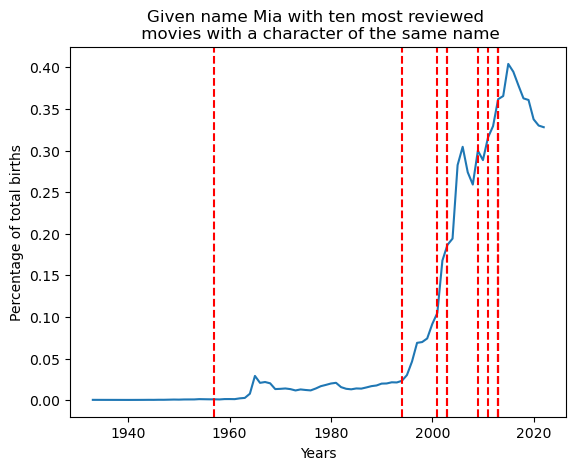

In [41]:
display(baby_name_df.loc[chosen_name].sort_values(by=['year']))

percentage_df = baby_name_df.loc[chosen_name]['percentage'].to_frame().reset_index()
percentage_df.sort_values(by=['year'], ascending=True, inplace=True)

x_values = percentage_df['year'].values
y_values = percentage_df['percentage'].values

# Create a scatter plot
plt.plot(x_values, y_values)
plt.xlabel('Years')
plt.ylabel('Percentage of total births')
plt.title(f'Given name {chosen_name} with ten most reviewed \n movies with a character of the same name')

# Draw vertical lines for each movie release
vertical_lines_series = filt_movie_df['release'].values
for x_value in vertical_lines_series:
    plt.axvline(x=x_value, color='r', linestyle='--', label=f'x={x_value}')

plt.show()